
# PIPLINE:
## Storage end
1. get you FILE(txt or jpg or else), determine KEY(two float: u,x), look up your KEY in MAP(a dictionary) to get KEYDNA(DNA sequence)
2. encrypt your FILE with KEY, get ENC-FILE(quanternary list as well as txtfile)
3. dna-fountain ENC-FILE, get FT-ENC-FILE
4. pack FT-ENC-FILE with KEYDNA, get PACKAGE

$ (3.5699456<u<=4, 0<X0<1) $

## Receiving end
1. from PACKAGE get KEYDNA， look up KEYDNA in MAP to get KEY
2. de-fountain FT-ENC-FILE， get ENC-FILE
3. de-encrypt ENC-FILE with KEY, get FILE


Some tips: 
1. Attention: some External Dependencies needed, eg. a MAP to encode key(u,x) to DNA 
2. complex file should be convert to binfile fist 
3. this code is for showing intermediate variables

In [1]:
import numpy as np
import random
import pdb
import os
import matplotlib
import matplotlib.pyplot as plt
p=pdb.set_trace
#from ENClib import *

from PIL import Image
imread=Image.open

In [2]:
import numpy as np
import random
import pdb
"""
first ？ num of quanternary shows some info
the leading 0 for binfile, 1 for txt, 2 for img
The second 0 means num of characters in the original list is even,1 for odd

"""
def num2quant(num,aimlist,places):
    while places!=0:
        tmp=int(num/pow(4,places-1))
        aimlist.append(tmp)
        num-=tmp*pow(4,places-1)
        places-=1
def quant2num(aimlist):
    places=len(aimlist)
    ans=0
    for i in range(places):
        ans+=aimlist[i]*pow(4,places-i-1)
    return ans
"""
num2quant(j,n,4) == 
                
            a1=int(j/64)
            a2=int((j-a1*64)/16)
            a3=int((j-a1*64-a2*16)/4)
            a4=int(j-a1*64-a2*16-a3*4)
            n.append(a1)
            n.append(a2)
            n.append(a3)
            n.append(a4)  
"""
      
def bin2quant(binfile):
    n=[]
    n.append(0)
    return n
def txt2quant(txt): 
    n=[]
    n.append(1)
    for i in txt:
        j=ord(i)
        num2quant(j,n,4)        
    return np.array(n)

def quant2txt(ql):
    txt=''
    if ql[0]==1:
        tmp=ql[1:].reshape(-1,4)
        for i in tmp:
            txt+=chr(64*i[0]+16*i[1]+4*i[2]+i[3])
    elif ql[0]==2:
        tmp=ql.reshape(-1,4)
        for i in tmp:
            txt+=chr(64*i[0]+16*i[1]+4*i[2]+i[3])
    return txt

def img2quant(img): 
    n=[]
    n.append(2)
    shape=img.shape
    if len(shape)==3:
        n.append(3)
    else:
        n.append(1)
    for i in shape[0:2]:
        num2quant(i,n,7)
    img=img.reshape(1,-1)
    for j in img[0]:
        num2quant(j,n,4) 
    return np.array(n)
def quant2img(ql):
    img=[]
    m=quant2num(ql[2:9])
    n=quant2num(ql[9:16])
    if ql[1]==3:
        shape=[m,n,3]
    else:
        shape=[m,n]
    print(shape)
    tmp=ql[16:].reshape(-1,4)
    for i in tmp:
        img.append(64*i[0]+16*i[1]+4*i[2]+i[3])
    return np.array(img).reshape(shape)

def gen_key(u,x,lens):
    a=0
    key_list=[]
    real_key=[]
    for i in range(50+lens):
        if i==0:
            key_list.append(x)
        else: 
            key_list.append(u*key_list[i-1]*(1-key_list[i-1]))
    for i in key_list[50:50+lens]:
        real_key.append(np.mod(round(i*100000000),10))
    real_key[0]=0
    return real_key
def encryp_quant(key,quant):
    """
    key is a tuple of 2
    """
    u,x=key
    lens=len(quant)
    key=gen_key(u,x,lens)
    return np.array([(quant[i]+key[i])%4 for i in range(len(quant))])
def deencryp_quant(key,quant):
    """
    key is a tuple of 3
    """
    u,x=key
    lens=len(quant)
    key=gen_key(u,x,lens)
    return np.array([(quant[i]-key[i])%4 for i in range(len(quant))])

def decode_quant(ql):
    if ql[0]==1 :
        return quant2txt(ql)
    elif ql[0]==2:
        return quant2img(ql)

In [10]:
#encryption img (now support one and 3 channel pics, todo： large pics support) 
img=np.array(imread("lena.jpg"))
#img=img[1000:1100,1000:1100]
shape=img.shape
quantlist=img2quant(img)
se_key=[3.733,0.4333]
#just for eg
enc_quantlist=encryp_quant(se_key,quantlist)
ENCFILE=quant2txt(enc_quantlist)
ff=open("encimg.txt",'w',encoding='utf-8')
ff.write(ENCFILE)
ff.close()

#———————————save enc img——————————
encimg=[]
tmp=enc_quantlist[16:].reshape(-1,4)
for i in tmp:
    encimg.append(64*i[0]+16*i[1]+4*i[2]+i[3])
encimg=np.array(encimg).reshape(shape)
plt.imsave('encimg.jpg',encimg.astype('uint8'))



#——————————fountain————————————#
#——————————add KEYDNA, get package—————————#


#——————————————————————receiving end(re)—————————————————————————————————————
#——————from package,get KEYDNA,then look for key————————#
#here need a search map operation to get key, but i havent done this
#KEYDNA=get_keydna(PACKAGE)
#key=get_key(KEYDNA,MAP)
#——————————defountain,get ENC-FILE——————————#
#not my part,get re_ENCFILE

re_key=se_key
re_ENCFILE=ENCFILE
re_enc_quantlist=txt2quant(re_ENCFILE)[1:]
re_quantlist=deencryp_quant(re_key,re_enc_quantlist)
re_file=decode_quant(re_quantlist)

plt.imsave('2.jpg',re_file.astype('uint8'))


[180, 180]


In [6]:
#encryption txt (simple txt files within ascii 0-127, others plz convert to binfile and then encryption )



#————————————————————storage end(se)—————————————————————————————
#init args
encoding='utf-8'
#args end

f=open("1.txt",'r',encoding=encoding)
#f=open("1.txt",'r')
txtfile=f.read()
f.close()
quantlist=txt2quant(txtfile)
se_key=[3.733,0.4333]
#just for eg
enc_quantlist=encryp_quant(se_key,quantlist)
ENCFILE=decode_quant(enc_quantlist)
ff=open("enctxt.txt",'w',encoding=encoding)
ff.write(ENCFILE)
ff.close()
#——————————fountain————————————#
#——————————add KEYDNA, get package—————————#


#——————————————————————receiving end(re)—————————————————————————————————————
#——————from package,get KEYDNA,then look for key————————#
#here need a search map operation to get key, but i havent done this
#KEYDNA=get_keydna(PACKAGE)
#key=get_key(KEYDNA,MAP)
#——————————defountain,get ENC-FILE——————————#
#not my part,get re_ENCFILE

re_key=se_key
re_ENCFILE=ENCFILE

re_enc_quantlist=txt2quant(re_ENCFILE)
re_quantlist=deencryp_quant(re_key,re_enc_quantlist)
re_file=quant2txt(re_quantlist)
ff=open("2.txt",'w',encoding=encoding)
ff.write(re_file)
ff.close()

80

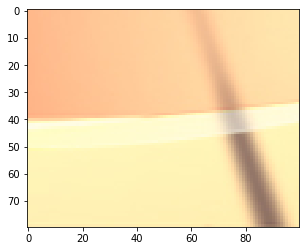

In [232]:
img=np.array(imread("24.jpg"))
img=img[1000:1100,1000:1100]
plt.imshow(img)

In [15]:
shape=img.shape

In [16]:
shape

(180, 180)

In [ ]:
#encryption general binary files


275

15